In [45]:
# import os
# import tensorflow 

# # کاهش سطح لاگ‌ها (اختیاری)
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# # تنظیم تعداد هسته‌های پردازش
# tensorflow.config.threading.set_intra_op_parallelism_threads(2)
# tensorflow.config.threading.set_inter_op_parallelism_threads(2)

# # حالا می‌توانید از TensorFlow استفاده کنید
# # برای مثال، تعریف مدل یا دیگر عملیات TensorFlow


## data set


In [46]:
import pandas as pd  
df = pd.read_csv('heart.csv')  # loading data base


In [47]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [49]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## preprocessing

In [50]:
x = df.drop('HeartDisease',axis='columns')  # removin HeartDisease from columns 

y= df['HeartDisease'] # adding HeartDisease to a one columns


In [51]:
x.shape , y.shape

((918, 11), (918,))

In [52]:
from sklearn.preprocessing import LabelEncoder  # converting string to int for machin to understanding
x = x.apply(LabelEncoder().fit_transform)

In [53]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


## Normalization

In [54]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
x_train.shape,x_test.shape ,y_train.shape



((734, 11), (184, 11), (734,))

In [56]:
import numpy as np
#x_train.iloc[0]            # iloc showing x_train into a data fraim
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [57]:
x_train[0]

array([ 14,   1,   2,  22,  98,   1,   1, 116,   0,  18,   0], dtype=int64)

In [58]:
x_test[0]

array([ 35,   0,   1,  41,  53,   0,   1, 105,   0,  10,   2], dtype=int64)

In [59]:
from sklearn.preprocessing import MinMaxScaler # normalization beet 0 & 1
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [60]:
x_train[0]

array([0.27083333, 1.        , 0.66666667, 0.33333333, 0.44343891,
       1.        , 0.5       , 0.98305085, 0.        , 0.34615385,
       0.        ])

## Model definition

In [61]:
import tensorflow as tf 
from tensorflow import keras
from keras import *

In [62]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(11,)))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dropout(rate=0.3))
model.add(keras.layers.Dense(units=128,activation='relu'))
model.add(keras.layers.Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_focal_crossentropy',metrics=['accuracy'])



In [63]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,713 (264.50 KB)

 Trainable params: 67,713 (264.50 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
hist = model.fit(x_train,y_train,epochs=200,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5394 - loss: 0.1713 - val_accuracy: 0.6196 - val_loss: 0.1568
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6184 - loss: 0.1582 - val_accuracy: 0.8043 - val_loss: 0.1403
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7448 - loss: 0.1382 - val_accuracy: 0.7772 - val_loss: 0.1225
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7883 - loss: 0.1278 - val_accuracy: 0.7663 - val_loss: 0.1218
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8140 - loss: 0.1243 - val_accuracy: 0.8043 - val_loss: 0.1157
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8270 - loss: 0.1086 - val_accuracy: 0.8098 - val_loss: 0.1132
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8313 - loss: 0.1104 - val_accuracy: 0.8261 - val_loss: 0.1096
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8335 - loss: 0.1093 - val_accuracy: 0.8370 - val_loss: 0.1011

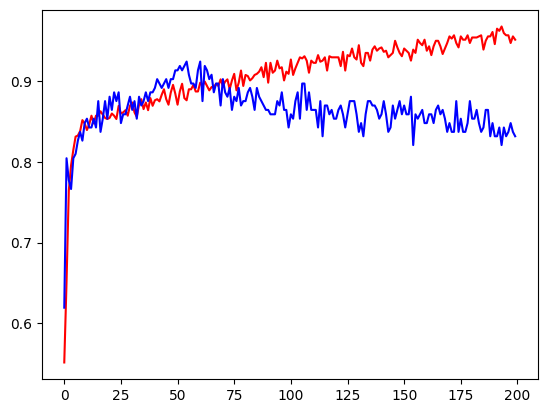

In [65]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'],color='red')
plt.plot(hist.history['val_accuracy'],color='blue')

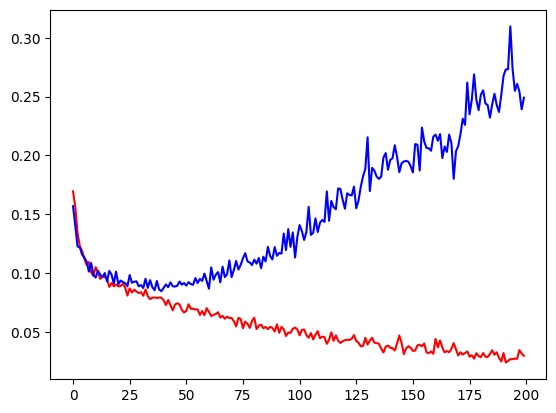

In [66]:
plt.plot(hist.history['loss'],color='red')
plt.plot(hist.history['val_loss'],color='blue')